In [4]:
import numpy as np
import pandas as pd
import tensorflow as tf
import xgboost
import lightgbm
import matplotlib.pyplot as plt

/Users/xiaolin/anaconda3/lib/python3.6/json/encoder.py:199: DeprecationWarning: Interpreting naive datetime as local 2017-08-20 11:37:29.085435. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


In [6]:
test0=np.random.normal(size=(100))

/Users/xiaolin/anaconda3/lib/python3.6/json/encoder.py:199: DeprecationWarning: Interpreting naive datetime as local 2017-08-20 11:37:52.700498. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


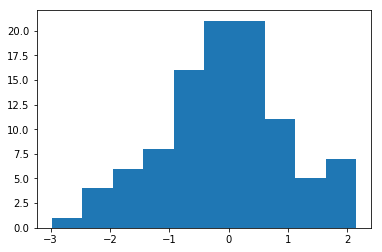

/Users/xiaolin/anaconda3/lib/python3.6/json/encoder.py:199: DeprecationWarning: Interpreting naive datetime as local 2017-08-20 11:37:54.779267. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


In [7]:
plt.hist(test0)
plt.show()

In [8]:
df0=pd.DataFrame(test0)

/Users/xiaolin/anaconda3/lib/python3.6/json/encoder.py:199: DeprecationWarning: Interpreting naive datetime as local 2017-08-20 11:37:58.676496. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


In [34]:
ds=df0.describe()
ds

,0
count,100.000000
mean,-0.090568
std,1.066494
min,-2.981467
25%,-0.766788
50%,-0.028593
75%,0.515228
max,2.147993


In [35]:
np.array(ds.iloc[3:,0]).ravel()

array([-2.9814672 , -0.76678776, -0.0285929 ,  0.51522751,  2.1479934 ])

In [32]:
from sklearn.linear_model import LinearRegression

linreg = LinearRegression()
x=np.array([0,1,2,3,4]).reshape(-1,1)

y=np.array(ds.iloc[3:,0]).ravel().reshape(-1,1)
print(x,y)
linreg.fit(x,y)
K=linreg.coef_
B=linreg.intercept_
y2=K*x+B

[[0]
 [1]
 [2]
 [3]
 [4]] [[-2.9814672 ]
 [-0.76678776]
 [-0.0285929 ]
 [ 0.51522751]
 [ 2.1479934 ]]


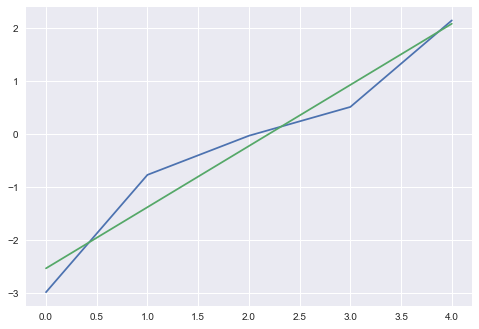

In [40]:
import seaborn as sns

plt.plot(np.array(ds.iloc[3:,0]).ravel())
plt.plot(x,y2)
plt.show()

从上面我们可以看出来正态分布的样本的分位数近似于成直线的分布

In [36]:
from sklearn.datasets import make_hastie_10_2
from sklearn.ensemble import GradientBoostingClassifier

X, y = make_hastie_10_2(random_state=0)
X_train, X_test = X[:2000], X[2000:]
y_train, y_test = y[:2000], y[2000:]

clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=1, random_state=0).fit(X_train, y_train)

In [39]:
clf.staged_decision_function(X=X)

<generator object GradientBoostingClassifier.staged_decision_function at 0x11c4974c0>

In [42]:
clf.decision_function

<bound method GradientBoostingClassifier.decision_function of GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=1.0, loss='deviance', max_depth=1,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=0, subsample=1.0, verbose=0,
              warm_start=False)>

In [43]:
clf.feature_importances_

array([ 0.1 ,  0.1 ,  0.12,  0.08,  0.11,  0.1 ,  0.08,  0.1 ,  0.11,  0.1 ])

In [44]:
clf.min_weight_fraction_leaf

0.0

In [45]:
clf.n_estimators

100

In [46]:
clf.verbose

0